**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle

**Loading data**

In [ ]:
data=pd.read_csv('Rainfall.csv')
data.head(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data.shape

(366, 12)

In [ ]:
data.isna().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [ ]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

**REMOVING UNWANTED SPACE**

In [ ]:
data.columns=data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data=data.drop(columns=['day'])

In [ ]:
data.head(5)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


**CHECKING MISSING VALUES**

In [ ]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [ ]:
data['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [ ]:
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())

In [ ]:
data['winddirection']=data['winddirection'].fillna(data['winddirection'].mode()[0])

In [ ]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [ ]:
data['rainfall']=data['rainfall'].map({'yes':1,'no':0})

In [ ]:
data

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


**Exploratory data Analysis**

In [ ]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

ValueError: num must be an integer with 1 <= num <= 9, not 10

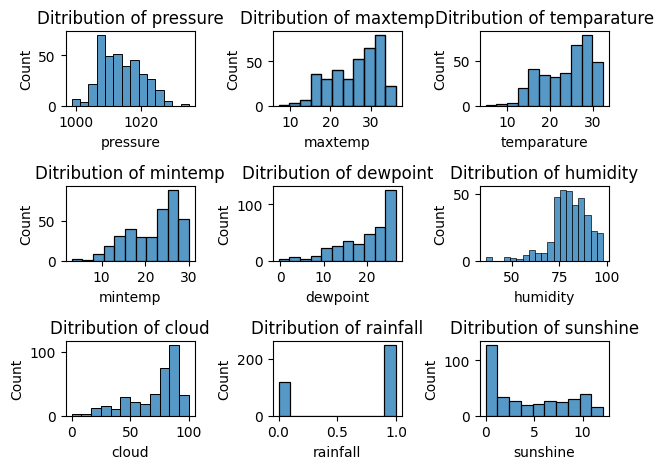

In [ ]:
for i,col in enumerate(data.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data[col])
    plt.title(f'Ditribution of {col}')

    plt.tight_layout()

<Axes: >

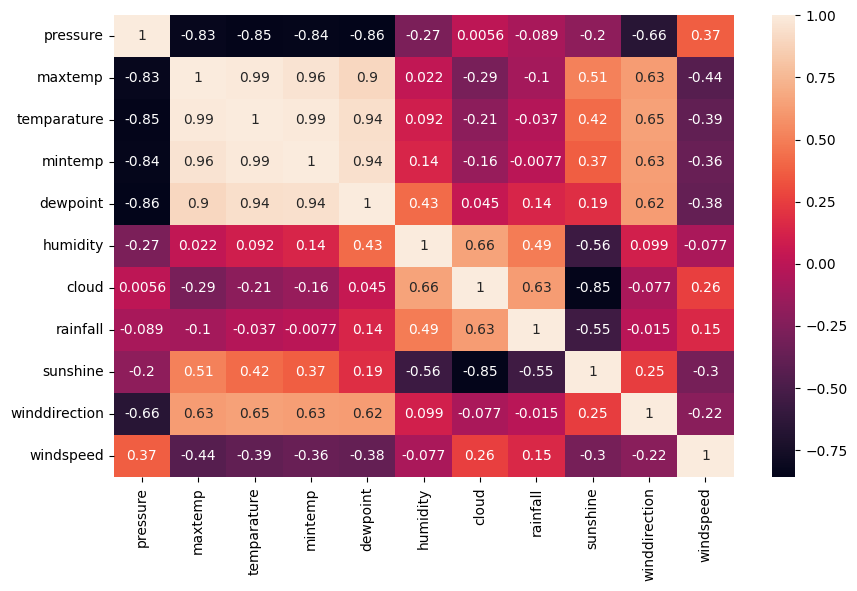

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

ValueError: num must be an integer with 1 <= num <= 9, not 10

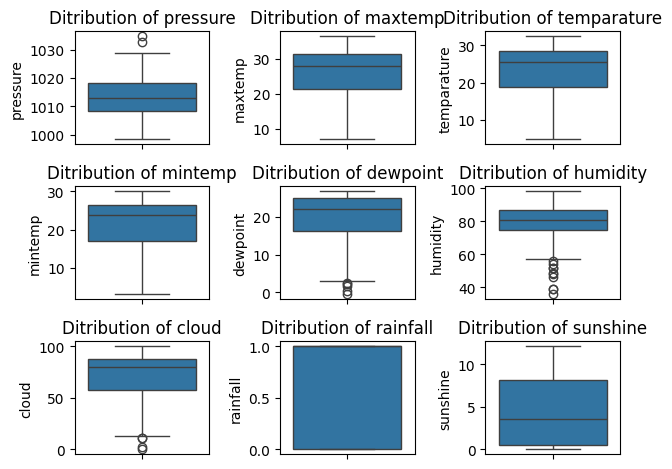

In [ ]:
for i,col in enumerate(data.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[col])
    plt.title(f'Ditribution of {col}')

    plt.tight_layout()

**REMOVING HIGHLY CORRELATED COLUMNS**

In [ ]:
data=data.drop(columns=["maxtemp"	,"temparature"	,"mintemp"])

In [ ]:
data.head(5)

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [ ]:
df_majority=data[data['rainfall']==1]
df_minority=data[data['rainfall']==0]

In [ ]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [ ]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)


In [ ]:
df_majority_downsampled.shape

(117, 8)

In [ ]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [ ]:
df_downsampled.shape

(234, 8)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


**SHUFFLE FINAL DATAFRAME**

In [ ]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
df_downsampled

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4
...,...,...,...,...,...,...,...,...
229,1008.1,25.4,86,75,1,5.7,20.0,9.5
230,1010.1,19.9,91,89,1,0.0,70.0,31.8
231,1020.6,14.7,91,88,1,0.3,50.0,24.4
232,1008.3,24.1,74,29,0,5.7,10.0,4.4


**Training**  **data**

In [ ]:
x=df_downsampled.drop(columns=['rainfall'],axis=1)
y=df_downsampled['rainfall']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'],
}



**Hyper parameter Tuning**

In [ ]:
grid_search_cv=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_rf_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_params_)

{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
cv_score=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print(cv_score)
print(np.mean(cv_score))

[0.71052632 0.76315789 0.86486486 0.81081081 0.91891892]
0.8136557610241821


In [ ]:
y_pred=best_rf_model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[16  8]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.70      0.83      0.76        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

0.7446808510638298


In [ ]:
#Predicting

input_data=(1022.2	,14.1	,78	,90	,0.0	,30.0	,28.5)
input_df=pd.DataFrame([input_data],columns=x.columns)

prediction=best_rf_model.predict(input_df)
print('prediction result: ',"Rainfall" if prediction[0]==1 else 'No rainfall')

prediction result:  Rainfall


In [ ]:
#save model

model_data={'model':best_rf_model,'feature_names': x.columns.tolist()}

with open('rainfall_prediction.sav','wb') as file:
    pickle.dump(model_data,file)

In [ ]:
with open('rainfall_prediction.sav','rb') as file:
    model_data=pickle.load(file)

In [ ]:
model=model_data['model']
feature_names=model_data['feature_names']

In [ ]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df=pd.DataFrame([input_data],columns=feature_names)

In [ ]:
prediction=best_rf_model.predict(input_df)
print('prediction result: ',"Rainfall" if prediction[0]==1 else 'No rainfall')

prediction result:  Rainfall
